In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/USVideosClean.xlsx"
data = pd.read_excel(file_path)
data.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,video_id,title,Count_of_!,Count_of_?,Count_Capital_Letters,channel_title,category_id,Category,tags,Num_tags,views,likes,dislikes,comment_count,like_dislike_ratio,view_comment_ratio,Viral?
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,0.0,0.0,28.0,CaseyNeistat,22.0,People & Blogs,SHANtell martin,1.0,748374.0,57527.0,2966.0,15954.0,19.395482,46.908236,Not Viral
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,0.0,0.0,11.0,LastWeekTonight,24.0,Entertainment,"last week tonight trump presidency|""last week ...",4.0,2418783.0,97185.0,6146.0,12703.0,15.812724,190.410376,Not Viral
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",0.0,0.0,8.0,Rudy Mancuso,23.0,Comedy,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",23.0,3191434.0,146033.0,5339.0,8181.0,27.352126,390.103166,Viral
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,0.0,1.0,4.0,Good Mythical Morning,24.0,Entertainment,"rhett and link|""gmm""|""good mythical morning""|""...",27.0,343168.0,10172.0,666.0,2146.0,15.273273,159.910531,Not Viral
4,d380meD0W0M,I Dare You: GOING BALD!?,1.0,1.0,12.0,nigahiga,24.0,Entertainment,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.0,2095731.0,132235.0,1989.0,17518.0,66.483157,119.633006,Not Viral


In [ ]:
print(data.columns)
print(data.dtypes)

Index(['video_id', 'title', 'Count_of_!', 'Count_of_?',
       'Count_Capital_Letters', 'channel_title', 'category_id', 'Category',
       'tags', 'Num_tags', 'views', 'likes', 'dislikes', 'comment_count',
       'like_dislike_ratio', 'view_comment_ratio', 'Viral?'],
      dtype='object')
video_id                  object
title                     object
Count_of_!               float64
Count_of_?               float64
Count_Capital_Letters    float64
channel_title             object
category_id              float64
Category                  object
tags                      object
Num_tags                 float64
views                    float64
likes                    float64
dislikes                 float64
comment_count            float64
like_dislike_ratio       float64
view_comment_ratio       float64
Viral?                    object
dtype: object


Encoded Target Variable (y) shape: (38179,)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



UMAP Transformed Data:
   UMAP_Component_1  UMAP_Component_2  UMAP_Component_3
0          5.791965          8.887272         -4.340494
1          1.979219          3.337965          0.016716
2          4.296455          6.257142          3.107112
3          7.681956          1.742681         -2.405621
4          7.256313         -0.532534         -1.118132


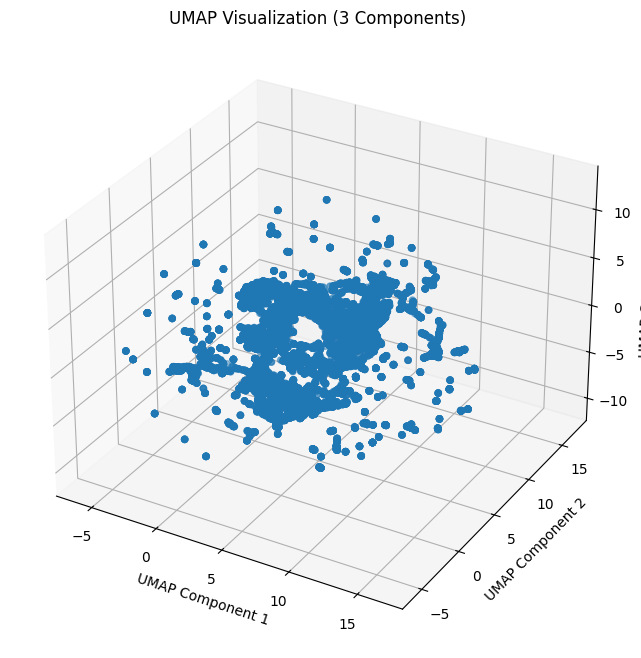

In [ ]:
X = data.drop('Viral?', axis=1)
y = data['Viral?']

# 1. Select Numerical Features, Handle Missing Values, and Scale
numerical_features = ['Count_of_!', 'Count_of_?', 'Count_Capital_Letters', 'Num_tags', 'likes', 'dislikes', 'comment_count', 'like_dislike_ratio', 'view_comment_ratio']
X_numerical = data[numerical_features].copy()
X_numerical_dropped = X_numerical.dropna(subset=numerical_features) # Drop NaN *before* splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical_dropped)
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features) #convert back to dataframe

# 2. Handle Target Variable
viral_labels = data.loc[X_numerical_dropped.index, 'Viral?']  # Get 'Viral?' labels corresponding to the dropped rows
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(viral_labels) # Encode the target variable
print("Encoded Target Variable (y) shape:", y.shape)



# Split the data into two halves
X_dim, X_no_dim_reduction, y_dim, y_no_dim_reduction = train_test_split(X_scaled_df, y, test_size=0.5, random_state=42)

import umap.umap_ as umap  # Note the specific import


n_components = 3
reducer = umap.UMAP(n_components=n_components, random_state=42)  # Added random_state for reproducibility
X_umap = reducer.fit_transform(X_dim) # Use the correct half of the data

# 3. Create a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=X_umap, columns=[f'UMAP_Component_{i+1}' for i in range(n_components)])
print("\nUMAP Transformed Data:")
print(umap_df.head())


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

ax.scatter(umap_df['UMAP_Component_1'], umap_df['UMAP_Component_2'], umap_df['UMAP_Component_3'])  # plot the 3 components
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('UMAP Visualization (3 Components)')
plt.show()


In [ ]:
def train_test_val_split(X, y, test_size=0.2, random_state=42):
    """Splits data into training, validation, and test sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Further split each half into train, validation, and test sets
# This is for the one with no dimensionality reduction done
X_train_no_dim, X_val_no_dim, X_test_no_dim, y_train_no_dim, y_val_no_dim, y_test_no_dim = train_test_val_split(X_no_dim_reduction, y_no_dim_reduction, test_size=0.2, random_state=42)


data_no_dim_reduction = X_train_no_dim.copy()
y_no_dim_reduction = y_train_no_dim.copy()



# Print the shapes of the resulting datasets to verify the split for the no dim reduction half
print("\nNo Dim Reduction - data_no_dim_reduction:", data_no_dim_reduction.shape)
print("No Dim Reduction - y_no_dim_reduction:", y_no_dim_reduction.shape)
print("No Dim Reduction - X_val:", X_val_no_dim.shape)
print("No Dim Reduction - X_test:", X_test_no_dim.shape)



No Dim Reduction - data_no_dim_reduction: (12217, 9)
No Dim Reduction - y_no_dim_reduction: (12217,)
No Dim Reduction - X_val: (3055, 9)
No Dim Reduction - X_test: (3818, 9)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Apply RandomForestClassifier to the no dimensionality reduction data with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200], # Reduced n_estimators
    'max_depth': [10, 20], # Reduced max_depth
    'min_samples_split': [2, 5], # Reduced min_samples_split
    'min_samples_leaf': [1, 2] # Reduced min_samples_leaf
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5) # cv=5 for cross-validation
grid_search_rf.fit(X_train_no_dim, y_train_no_dim) # Fit on training data
best_rf_model = grid_search_rf.best_estimator_

# Evaluate on Train, Validation, and Test sets
y_pred_rf_train = best_rf_model.predict(X_train_no_dim)
y_pred_rf_val = best_rf_model.predict(X_val_no_dim)
y_pred_rf_test = best_rf_model.predict(X_test_no_dim)


print("\n--- Random Forest (No Dim Reduction) ---")
print("Best Hyperparameters:", grid_search_rf.best_params_)

print("\nTraining Set Performance:")
accuracy_rf_train = accuracy_score(y_train_no_dim, y_pred_rf_train)
print(f"Accuracy: {accuracy_rf_train:.4f}")
print("Classification Report:")
print(classification_report(y_train_no_dim, y_pred_rf_train))

print("\nValidation Set Performance:")
accuracy_rf_val = accuracy_score(y_val_no_dim, y_pred_rf_val)
print(f"Accuracy: {accuracy_rf_val:.4f}")
print("Classification Report:")
print(classification_report(y_val_no_dim, y_pred_rf_val))

print("\nTest Set Performance:")
accuracy_rf_test = accuracy_score(y_test_no_dim, y_pred_rf_test)
print(f"Accuracy: {accuracy_rf_test:.4f}")
print("Classification Report:")
print(classification_report(y_test_no_dim, y_pred_rf_test))




--- Random Forest (No Dim Reduction) ---
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Training Set Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10377
           1       1.00      1.00      1.00      1840

    accuracy                           1.00     12217
   macro avg       1.00      1.00      1.00     12217
weighted avg       1.00      1.00      1.00     12217


Validation Set Performance:
Accuracy: 0.9876
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2592
           1       0.97      0.95      0.96       463

    accuracy                           0.99      3055
   macro avg       0.98      0.97      0.98      3055
weighted avg       0.99      0.99      0.99      3055


Test Set Performance:
Accuracy: 0.9856
Classification Repor

In [ ]:
# Apply KNN to the no dimensionality reduction data with hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train_no_dim, y_train_no_dim) # Fit on training data
best_knn_model = grid_search_knn.best_estimator_

# Evaluate on Train, Validation, and Test sets
y_pred_knn_train = best_knn_model.predict(X_train_no_dim)
y_pred_knn_val = best_knn_model.predict(X_val_no_dim)
y_pred_knn_test = best_knn_model.predict(X_test_no_dim)

print("\n--- KNN (No Dim Reduction) ---")
print("Best Hyperparameters:", grid_search_knn.best_params_)

print("\nTraining Set Performance:")
accuracy_knn_train = accuracy_score(y_train_no_dim, y_pred_knn_train)
print(f"Accuracy: {accuracy_knn_train:.4f}")
print("Classification Report:")
print(classification_report(y_train_no_dim, y_pred_knn_train))

print("\nValidation Set Performance:")
accuracy_knn_val = accuracy_score(y_val_no_dim, y_pred_knn_val)
print(f"Accuracy: {accuracy_knn_val:.4f}")
print("Classification Report:")
print(classification_report(y_val_no_dim, y_pred_knn_val))

print("\nTest Set Performance:")
accuracy_knn_test = accuracy_score(y_test_no_dim, y_pred_knn_test)
print(f"Accuracy: {accuracy_knn_test:.4f}")
print("Classification Report:")
print(classification_report(y_test_no_dim, y_pred_knn_test))



--- KNN (No Dim Reduction) ---
Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Training Set Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10377
           1       1.00      1.00      1.00      1840

    accuracy                           1.00     12217
   macro avg       1.00      1.00      1.00     12217
weighted avg       1.00      1.00      1.00     12217


Validation Set Performance:
Accuracy: 0.9689
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2592
           1       0.89      0.91      0.90       463

    accuracy                           0.97      3055
   macro avg       0.94      0.94      0.94      3055
weighted avg       0.97      0.97      0.97      3055


Test Set Performance:
Accuracy: 0.9696
Classification Report:
              precision    recall  f1-score

In [ ]:
X_train_umap, X_val_umap, X_test_umap, y_train_umap, y_val_umap, y_test_umap = train_test_val_split(
    umap_df, y_dim, test_size=0.2, random_state=42)

In [ ]:
# Apply RandomForestClassifier to the UMAP transformed data with hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200],  # Reduced n_estimators
    'max_depth': [10, 20],  # Reduced max_depth
    'min_samples_split': [2, 5],  # Reduced min_samples_split
    'min_samples_leaf': [1, 2]  # Reduced min_samples_leaf
}
grid_search_rf_umap = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf,
                                    cv=5)  # cv=5 for cross-validation
grid_search_rf_umap.fit(X_train_umap, y_train_umap)  # Fit on training data
best_rf_model_umap = grid_search_rf_umap.best_estimator_

# Evaluate on Train, Validation, and Test sets
y_pred_rf_train_umap = best_rf_model_umap.predict(X_train_umap)
y_pred_rf_val_umap = best_rf_model_umap.predict(X_val_umap)
y_pred_rf_test_umap = best_rf_model_umap.predict(X_test_umap)

print("\n--- Random Forest (UMAP) ---")
print("Best Hyperparameters:", grid_search_rf_umap.best_params_)

print("\nTraining Set Performance:")
accuracy_rf_train_umap = accuracy_score(y_train_umap, y_pred_rf_train_umap)
print(f"Accuracy: {accuracy_rf_train_umap:.4f}")
print("Classification Report:")
print(classification_report(y_train_umap, y_pred_rf_train_umap))

print("\nValidation Set Performance:")
accuracy_rf_val_umap = accuracy_score(y_val_umap, y_pred_rf_val_umap)
print(f"Accuracy: {accuracy_rf_val_umap:.4f}")
print("Classification Report:")
print(classification_report(y_val_umap, y_pred_rf_val_umap))

print("\nTest Set Performance:")
accuracy_rf_test_umap = accuracy_score(y_test_umap, y_pred_rf_test_umap)
print(f"Accuracy: {accuracy_rf_test_umap:.4f}")
print("Classification Report:")
print(classification_report(y_test_umap, y_pred_rf_test_umap))



--- Random Forest (UMAP) ---
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Training Set Performance:
Accuracy: 0.9998
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10427
           1       1.00      1.00      1.00      1789

    accuracy                           1.00     12216
   macro avg       1.00      1.00      1.00     12216
weighted avg       1.00      1.00      1.00     12216


Validation Set Performance:
Accuracy: 0.9581
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2610
           1       0.89      0.81      0.85       445

    accuracy                           0.96      3055
   macro avg       0.93      0.90      0.91      3055
weighted avg       0.96      0.96      0.96      3055


Test Set Performance:
Accuracy: 0.9563
Classification Report:
         

In [ ]:
# Apply KNN to the UMAP transformed data with hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan, 2 for Euclidean
}
grid_search_knn_umap = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn_umap.fit(X_train_umap, y_train_umap)  # Fit on training data
best_knn_model_umap = grid_search_knn_umap.best_estimator_

# Evaluate on Train, Validation, and Test sets
y_pred_knn_train_umap = best_knn_model_umap.predict(X_train_umap)
y_pred_knn_val_umap = best_knn_model_umap.predict(X_val_umap)
y_pred_knn_test_umap = best_knn_model_umap.predict(X_test_umap)

print("\n--- KNN (UMAP) ---")
print("Best Hyperparameters:", grid_search_knn_umap.best_params_)

print("\nTraining Set Performance:")
accuracy_knn_train_umap = accuracy_score(y_train_umap, y_pred_knn_train_umap)
print(f"Accuracy: {accuracy_knn_train_umap:.4f}")
print("Classification Report:")
print(classification_report(y_train_umap, y_pred_knn_train_umap))

print("\nValidation Set Performance:")
accuracy_knn_val_umap = accuracy_score(y_val_umap, y_pred_knn_val_umap)
print(f"Accuracy: {accuracy_knn_val_umap:.4f}")
print("Classification Report:")
print(classification_report(y_val_umap, y_pred_knn_val_umap))

print("\nTest Set Performance:")
accuracy_knn_test_umap = accuracy_score(y_test_umap, y_pred_knn_test_umap)
print(f"Accuracy: {accuracy_knn_test_umap:.4f}")
print("Classification Report:")
print(classification_report(y_test_umap, y_pred_knn_test_umap))



--- KNN (UMAP) ---
Best Hyperparameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

Training Set Performance:
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10427
           1       1.00      1.00      1.00      1789

    accuracy                           1.00     12216
   macro avg       1.00      1.00      1.00     12216
weighted avg       1.00      1.00      1.00     12216


Validation Set Performance:
Accuracy: 0.9542
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2610
           1       0.86      0.82      0.84       445

    accuracy                           0.95      3055
   macro avg       0.91      0.90      0.91      3055
weighted avg       0.95      0.95      0.95      3055


Test Set Performance:
Accuracy: 0.9502
Classification Report:
              precision    recall  f1-score   support



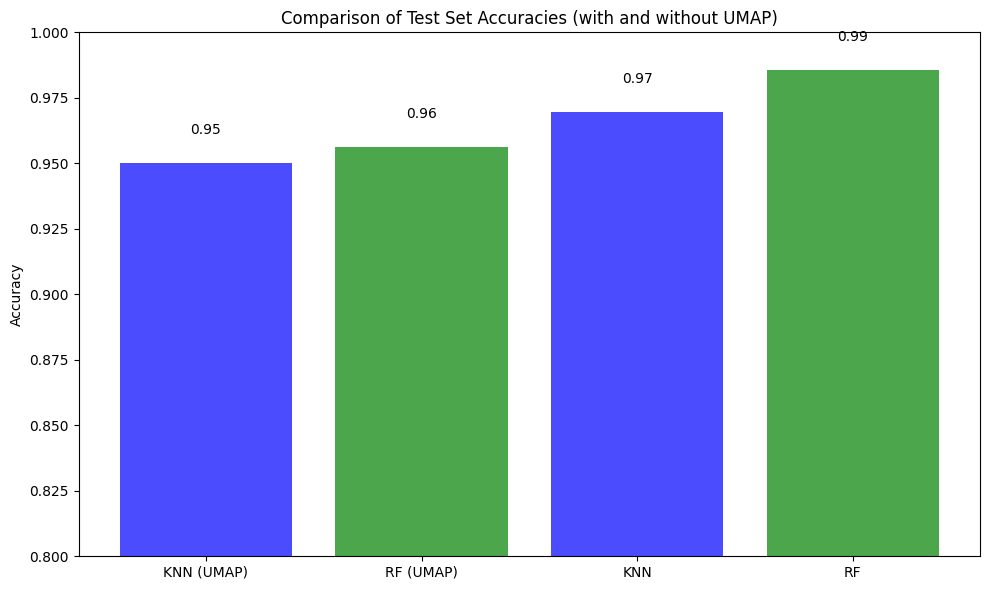

In [ ]:
# Test Performance models
data = [accuracy_knn_test_umap, accuracy_rf_test_umap, accuracy_knn_test, accuracy_rf_test]
labels = ['KNN (UMAP)', 'RF (UMAP)', 'KNN', 'RF']
x_pos = np.arange(len(labels))

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(x_pos, data, align='center', alpha=0.7, color=['blue', 'green', 'blue', 'green']) # Color-coded for visual distinction
plt.xticks(x_pos, labels)
plt.ylabel('Accuracy')
plt.title('Comparison of Test Set Accuracies (with and without UMAP)')
plt.ylim(0.8, 1)  # Set y-axis limit from 0.8 to 1

# Add text labels above each bar
for i, v in enumerate(data):
    plt.text(x_pos[i], v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Add a legend (optional, but good for clarity)
# plt.legend(labels, loc='upper left') # Removed legend to reduce redundancy.

# Add grid lines

# Show the plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
# Feature Importance
feature_importances = best_rf_model.feature_importances_
# Assuming your original data (before splitting) had column names, replace with actual names if available
feature_names = [f"feature_{i+1}" for i in range(X_train_no_dim.shape[1])]
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("\nFeature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
feature_5: 0.2685
feature_7: 0.2336
feature_9: 0.2097
feature_6: 0.1831
feature_8: 0.0501
feature_4: 0.0252
feature_3: 0.0249
feature_1: 0.0039
feature_2: 0.0011
